# Matlotlib & PyPlot

In this notebook, we'll look at plotting in a little more depth.  A very common package for plotting is Matplotlib.  PyPlot is a submodule of Matplotlib which offers a simplified interface (similar to Matlab).

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

A figure consists of several components

![anatomy of a figure](https://matplotlib.org/_images/anatomy.png)

(from the [matplotlib useage guide](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure))

## Figures and Axes

A `figure` is a high level object which holds together everything in a plot.  However, an `Axis` object does most of the work in displaying a plot.  You can have multiple axis objects in a figure, displayed as subplots.

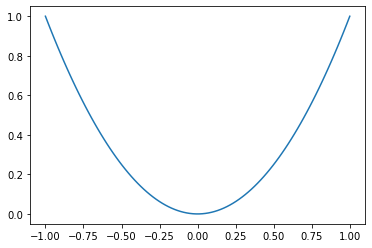

In [2]:
fig, ax = plt.subplots() # figure with a single axis

x = np.linspace(-1,1,100)
y = x**2
ax.plot(x, y) # the axis is what actually displays the plot

plt.show(fig)

When you create multipule subplots, `ax` contains an array of axes

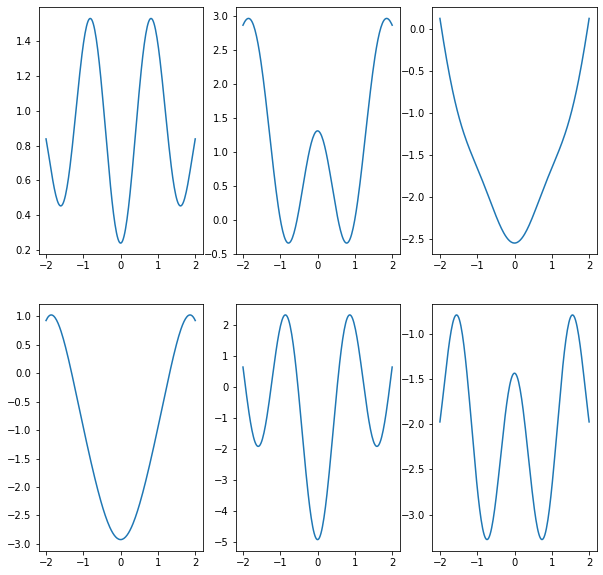

In [3]:
def random_fourier_fn(x, deg=3):
    A = np.vstack([np.cos(k*x) for k in range(deg)])
    c = np.random.randn(deg)
    return c.T @ A
    

m, n = 2, 3 # rows, columns of subplots
fig, ax = plt.subplots(2, 3, figsize=(10,10))

x = np.linspace(-2,2,200)
for i in range(m):
    for j in range(n):
        ax[i,j].plot(x, random_fourier_fn(x, deg=5))

If you want to customize the location and shape of subplots, you can use `gridspec` - see the [tutorial](https://matplotlib.org/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py) for more details

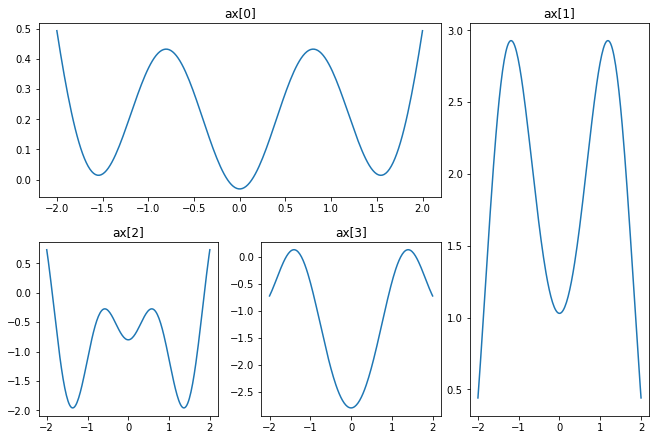

In [15]:
fig = plt.figure(constrained_layout=True, figsize=(9,6)) # figsize=(width, height)
gs = fig.add_gridspec(2, 3) # 2-dimensional grid

ax = []
ax.append(fig.add_subplot(gs[0, :-1])) # first 2 columns of first row
ax.append(fig.add_subplot(gs[:,-1])) # last column of grid
ax.append(fig.add_subplot(gs[1,0])) # bottom left
ax.append(fig.add_subplot(gs[1,1])) # bottom center

x = np.linspace(-2,2,200)
for i in range(4):
    ax[i].plot(x, random_fourier_fn(x, deg=5))
    ax[i].set_title('ax[{}]'.format(i))
    



## Axes

Now we'll look at some of the ways you can control the appearance of axes

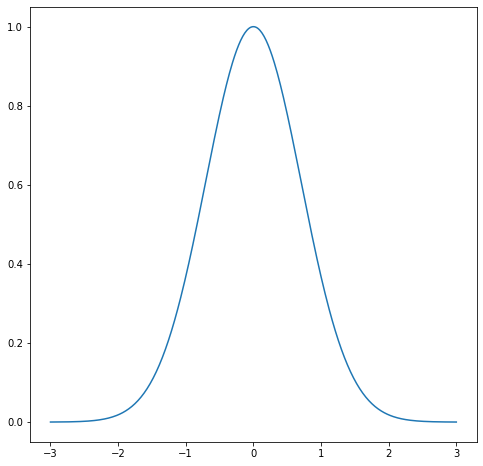

In [16]:
f = lambda x : np.exp(-x**2)
x = np.linspace(-3,3,400)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, f(x))
plt.show(fig)

You can control the appearance of ticks on each axis using `Locator`s (for the location of ticks) and `Formatter`s for the appearance.  You can see a [demo here](https://matplotlib.org/3.1.0/gallery/ticks_and_spines/major_minor_demo.html).  Using our example:

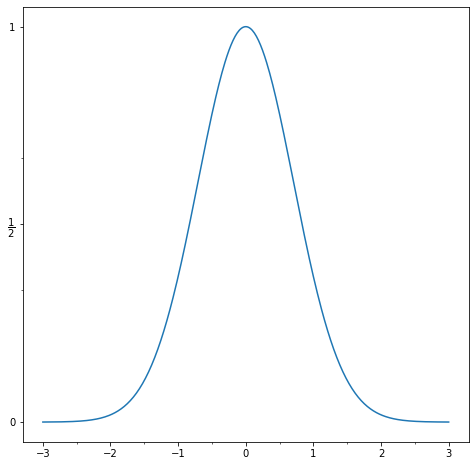

In [6]:
from matplotlib.ticker import MultipleLocator, FixedLocator, FixedFormatter

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, f(x))

ax.xaxis.set_minor_locator(MultipleLocator(0.5))# minor ticks are multiples of 0.5 on X-axis

ax.yaxis.set_major_locator(FixedLocator((0,0.5,1))) # set major tick labels manually
ax.yaxis.set_major_formatter(FixedFormatter(('0', r'$\dfrac{1}{2}$', '1'))) # manual labels - you can use latex
ax.yaxis.set_minor_locator(FixedLocator((1/3, 2/3)))

plt.show(fig)

You can set axes labels using `set_ylabel` and `set_xlabel` methods, and title with `set_title`

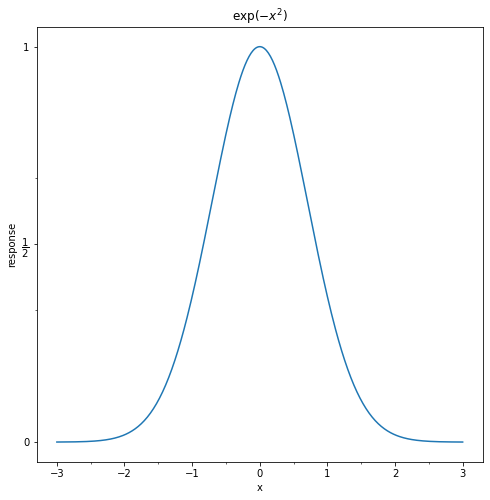

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, f(x))

ax.xaxis.set_minor_locator(MultipleLocator(0.5))# minor ticks are multiples of 0.5 on X-axis

ax.yaxis.set_major_locator(FixedLocator((0,0.5,1))) # set major tick labels manually
ax.yaxis.set_major_formatter(FixedFormatter(('0', r'$\dfrac{1}{2}$', '1')))
ax.yaxis.set_minor_locator(FixedLocator((1/3, 2/3)))

ax.set_xlabel('x')
ax.set_ylabel('response')
ax.set_title(r'$\exp(-x^2)$') # note LaTeX string

plt.show(fig)

You can also impose a grid on the axes

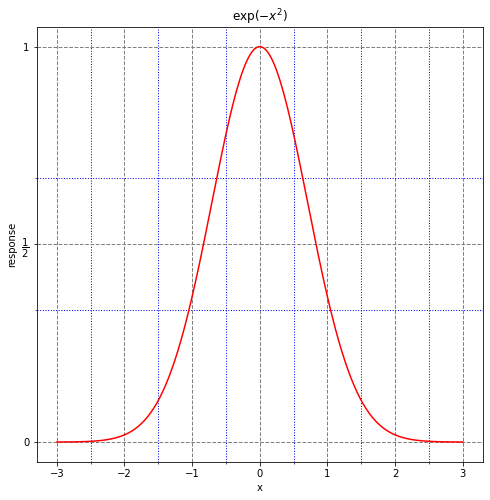

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x, f(x), c='r')

ax.xaxis.set_minor_locator(MultipleLocator(0.5))# minor ticks are multiples of 0.5 on X-axis

ax.yaxis.set_major_locator(FixedLocator((0,0.5,1))) # set major tick labels manually
ax.yaxis.set_major_formatter(FixedFormatter(('0', r'$\dfrac{1}{2}$', '1')))
ax.yaxis.set_minor_locator(FixedLocator((1/3, 2/3)))

ax.grid(which='major', color=(0.5,0.5,0.5,0.2), linestyle='--', linewidth=1)
ax.grid(which='minor', color=(0,0,0.9,0.2), linestyle=':', linewidth=1)

ax.set_xlabel('x')
ax.set_ylabel('response')
ax.set_title(r'$\exp(-x^2)$') # note LaTeX string

plt.show(fig)

## Plotting

We'll cover a few extra tidbits about plotting

### Color

There are a variety of ways you can specify colors.  See [the demo](https://matplotlib.org/3.1.0/tutorials/colors/colors.html) for several examples.

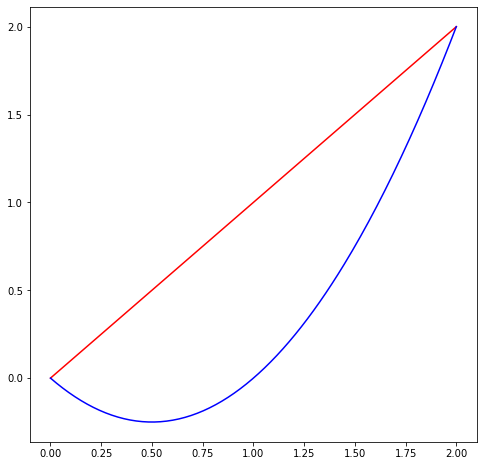

In [18]:
fs = [
    lambda x : x,
    lambda x : x * (x - 1)
]


fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(0, 2, 200)

ax.plot(x, fs[0](x), c='r')
ax.plot(x, fs[1](x), c='b')


plt.show(fig)

### Plot Format

The first two arguments to `plot` are arrays `x, y`.  The third (optional) arugment is a format string.  You can specify color, marker type, and line style in this string.

* color: supported abbreviations are `b`, `g`, `r`, `c`, `m`, `y`, `k`, `w`
* markers: also single character abbreviations (see `help(plt.plot)` for full list)
* line style: `-`, `--`, `-.`, and `:`



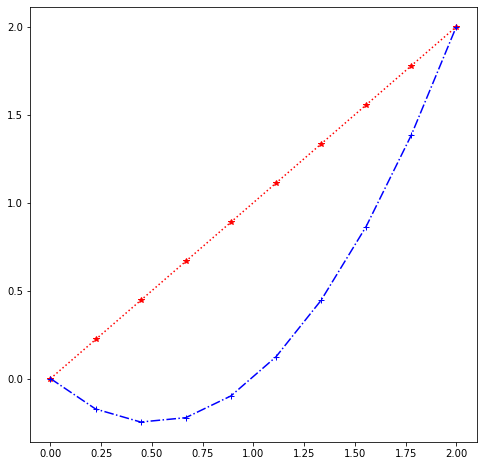

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(0, 2, 10)

ax.plot(x, fs[0](x), '*r:')
ax.plot(x, fs[1](x), '+b-.')


plt.show(fig)

You can also format scatter plot markers with similar characters

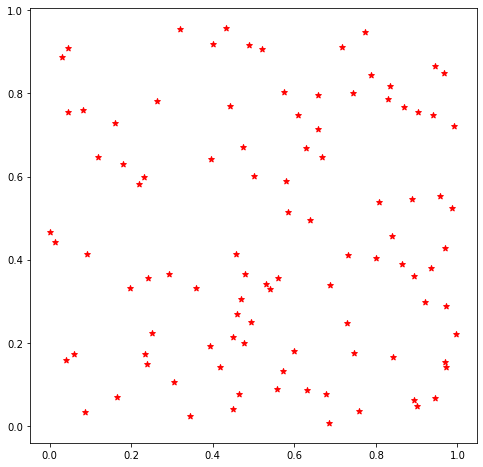

In [19]:
fig, ax = plt.subplots(figsize=(8,8))

n = 100
x = np.random.rand(2, n)

ax.scatter(x[0], x[1], c='r', marker='*')


plt.show(fig)

### Legends

In order to use a legend, you should first label your line plots and scatter plots using `label`.  By default, the legend will be placed in a region of the plot with some blank space

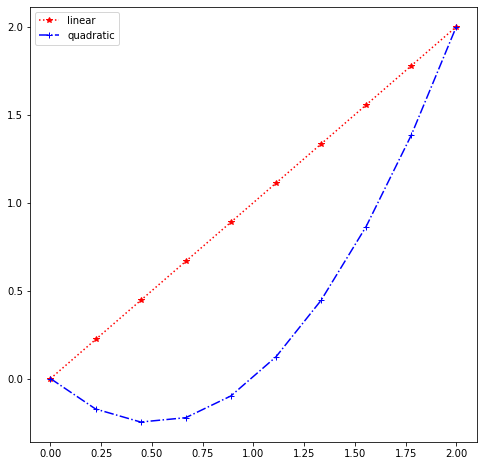

In [20]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(0, 2, 10)

ax.plot(x, fs[0](x), '*r:', label='linear')
ax.plot(x, fs[1](x), '+b-.', label='quadratic')
ax.legend()


plt.show(fig)

see `help(plt.legend)` for the many options you can use.  One useful command can be used to place a legend outside the axis box:

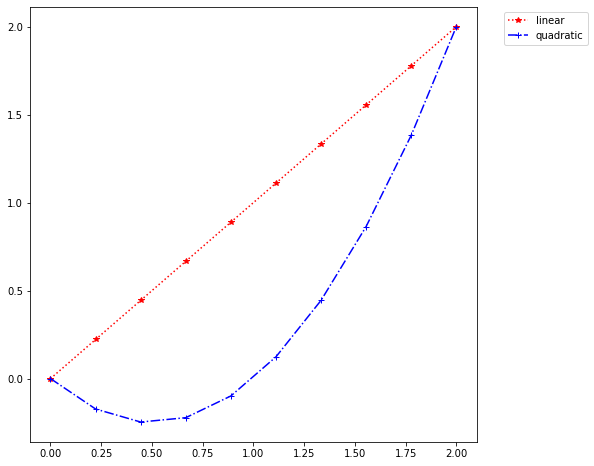

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

x = np.linspace(0, 2, 10)

ax.plot(x, fs[0](x), '*r:', label='linear')
ax.plot(x, fs[1](x), '+b-.', label='quadratic')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show(fig)

## Further Reading

Depending on what you are interested in doing, you may wish to dive into additional topics.  

See the [matplotlib tutorials](https://matplotlib.org/tutorials/index.html) to get started.

You can also read more about the API in [the documentation](https://matplotlib.org/api/index.html)